<a href="https://colab.research.google.com/github/JDLiu/AIOTAtNCHU/blob/main/AIOT_%E5%A4%9A%E5%B1%A4nn_Linear_%2Bsigmoid_%C3%A8_%E9%9D%9E%E7%B7%9A%E6%80%A7%E5%88%86%E9%A1%9E%C3%A8_MLP_(DNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Topic L13-1 非線性Boundary Classification=> MLP multiple layer perceptron

Step 1: load data ord import library

In [ ]:
!pip install torch

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [ ]:
n=500
#隨機產生圓圈狀資料點,回傳座標
X,y=datasets.make_circles(n_samples=n,random_state=123,noise=0.1,factor=0.2)
tensorX=torch.Tensor(X)
tensorY=torch.Tensor(y.reshape(n,1))
#print(tensorY.size())
#print(X[:10,:])

#只印出y=1
condition=(y==1)
#print(y[condition])

#只印出y=1的X
#print(X[condition,:])

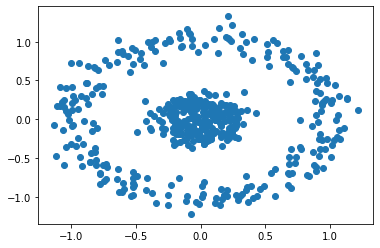

In [ ]:
plt.scatter(X[:,0],X[:,1])

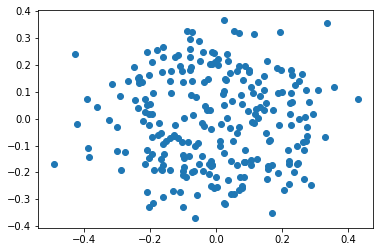

In [ ]:
#內圈
plt.scatter(X[condition,0],X[condition,1])

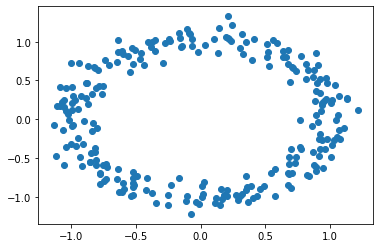

In [ ]:
#外圈
condition=(y==0)
plt.scatter(X[condition,0],X[condition,1])

In [ ]:
def plot_points():
  plt.scatter(X[y==0,0],X[y==0,1])
  plt.scatter(X[y==1,0],X[y==1,1])

In [ ]:
class Model(nn.Module):
  def __init__(self,inSize,h1,outSize):
      super().__init__()
      self.l1=nn.Linear(inSize,h1)
      self.l2=nn.Linear(h1,outSize)
  def forward(self,x):
    y=self.l1(x)
    y1=torch.sigmoid(y)
    y11=self.l2(y1)
    y2=torch.sigmoid(y11)
    return y2
  def predict(x):
    y_hat=self.forward(x)
    if y_hat>=0.5:
      return 1
    else:
      return 0

model=Model(2,4,1)
#print(model)
#print(list(model.parameters()))
criterion=nn.BCELoss()
optimozer=torch.optim.Adam(model.parameters(),lr=0.2)

Step 3: Train Model

0 tensor(0.7242, grad_fn=<BinaryCrossEntropyBackward>)
10 tensor(0.6610, grad_fn=<BinaryCrossEntropyBackward>)
20 tensor(0.4542, grad_fn=<BinaryCrossEntropyBackward>)
30 tensor(0.2609, grad_fn=<BinaryCrossEntropyBackward>)
40 tensor(0.1325, grad_fn=<BinaryCrossEntropyBackward>)
50 tensor(0.0713, grad_fn=<BinaryCrossEntropyBackward>)
60 tensor(0.0459, grad_fn=<BinaryCrossEntropyBackward>)
70 tensor(0.0339, grad_fn=<BinaryCrossEntropyBackward>)
80 tensor(0.0271, grad_fn=<BinaryCrossEntropyBackward>)
90 tensor(0.0226, grad_fn=<BinaryCrossEntropyBackward>)


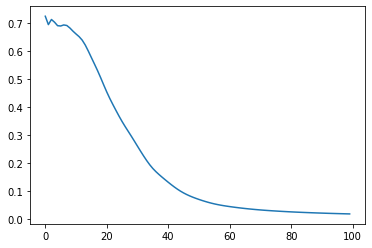

In [ ]:
epochs=100
losses=[]
for epoch in range(epochs):
  yPred=model.forward(tensorX)
  loss=criterion(yPred,tensorY)
  losses.append(loss)

  if epoch%10==0:
    print(epoch,loss)

  optimozer.zero_grad()
  loss.backward()
  optimozer.step()

plt.plot(range(epochs),losses)

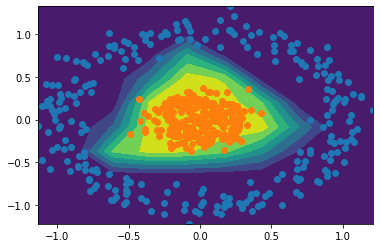

In [ ]:
def plot_fit():
  xs=np.linspace(min(X[:,0]),max(X[:,0]),10)
  ys=np.linspace(min(X[:,1]),max(X[:,1]),10)
  xx,yy=np.meshgrid(xs,ys)
  #把XY攤平
  grid= torch.Tensor(np.c_[xx.ravel(),yy.ravel()])
  #print(grid)
  z=model.forward(grid)
  #轉
  z1=z.view(xx.shape).detach().numpy()
  #print(z1)
  #plt.contour(xx,yy,z1)
  plt.contourf(xx,yy,z1)
  plot_points()

plot_fit()